# 04 ¬∑ Comparativo SMOTE vs Class Weight
## Experimento Controlado de T√©cnicas de Balanceamento

<div align="center">

```
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ   BALANCING TECHNIQUES COMPARISON - EXPERIMENT v1.0        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
```

![Status](https://img.shields.io/badge/Status-Experiment%20Complete-success)
![Type](https://img.shields.io/badge/Type-Comparative%20Analysis-blue)
![Priority](https://img.shields.io/badge/Priority-HIGH-orange)

</div>

---

### OBJETIVO

Identificar a t√©cnica √≥tima de balanceamento para minimizar overfitting e maximizar generaliza√ß√£o, atrav√©s de experimento controlado com 4 abordagens distintas.

### HIP√ìTESE DE PESQUISA

<div style="background-color: #e7f3ff; border-left: 4px solid #2196f3; padding: 15px;">

**HIP√ìTESE PRINCIPAL:**  
SMOTE cria **amostras sint√©ticas** que podem introduzir padr√µes artificiais, causando:
- Memoriza√ß√£o da distribui√ß√£o de treino
- Alta performance em treino, baixa em teste
- Falha de generaliza√ß√£o para dados reais

**PREDI√á√ÉO:**  
Se SMOTE for a causa do overfitting:
- [OK] `class_weight='balanced'` ‚Üí menor gap treino-teste
- [OK] Melhor PR-AUC em teste (mesmo com menor PR-AUC em treino)
- [OK] Modelo mais est√°vel e confi√°vel

</div>

### DESIGN EXPERIMENTAL

<table>
<tr><th>Experimento</th><th>T√©cnica</th><th>Complexidade</th><th>Objetivo</th></tr>
<tr><td>1</td><td>No Balancing</td><td>Baseline</td><td>Performance sem interven√ß√£o</td></tr>
<tr><td>2</td><td>Class Weight</td><td>Simples</td><td>Balanceamento algor√≠tmico</td></tr>
<tr><td>3</td><td>SMOTE Only</td><td>Moderada</td><td>Oversampling sint√©tico</td></tr>
<tr><td>4</td><td>SMOTE-ENN</td><td>Alta</td><td>Oversampling + Undersampling</td></tr>
</table>

### ARQUITETURA EXPERIMENTAL

```
                        ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
                        ‚îÇ  Dataset Base   ‚îÇ
                        ‚îÇ  (Imbalanced)   ‚îÇ
                        ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                                 ‚îÇ
                    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
                    ‚îÇ            ‚îÇ            ‚îÇ
         ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñº‚îÄ‚îê    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚ñº‚îÄ‚îÄ‚îÄ‚îÄ‚îê   ‚îå‚îÄ‚îÄ‚ñº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
         ‚îÇ Experiment 1‚îÇ    ‚îÇ  Exp 2  ‚îÇ   ‚îÇ  Exp 3 & 4  ‚îÇ
         ‚îÇ (Baseline)  ‚îÇ    ‚îÇ (Class  ‚îÇ   ‚îÇ  (SMOTE)    ‚îÇ
         ‚îÇ No Balance  ‚îÇ    ‚îÇ Weight) ‚îÇ   ‚îÇ  Variants   ‚îÇ
         ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îò   ‚îî‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                ‚îÇ                ‚îÇ            ‚îÇ
                ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                                 ‚îÇ
                        ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
                        ‚îÇ  LightGBM Model ‚îÇ
                        ‚îÇ  (Same params)  ‚îÇ
                        ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                                 ‚îÇ
                        ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
                        ‚îÇ  Evaluation &   ‚îÇ
                        ‚îÇ   Comparison    ‚îÇ
                        ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
```

> **CONTROLE EXPERIMENTAL:** Todos os modelos usam mesmos hiperpar√¢metros, mesma seed, mesma m√©trica de avalia√ß√£o. √önica vari√°vel: t√©cnica de balanceamento.

---

In [1]:
# Environment Setup
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, str(Path('..') / 'utils'))

# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from datetime import datetime

# ML imports
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_recall_curve,
    f1_score, precision_score, recall_score, confusion_matrix
)
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Utils
from data import load_data, save_artifact
from metrics import pr_auc_score

# Visualization
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# Load config
with open('../config.yaml', 'r') as f:
    CONFIG = yaml.safe_load(f)

# Paths
notebook_dir = Path('.').resolve().parent
DATA_DIR = notebook_dir / CONFIG['paths']['data']
ARTIFACTS_DIR = notebook_dir / CONFIG['paths']['artifacts']

RANDOM_STATE = CONFIG['random_state']

print("[OK] Environment configured")
print(f" Data: {DATA_DIR}")
print(f" Artifacts: {ARTIFACTS_DIR}")

[OK] Environment configured
 Data: C:\Users\gafeb\OneDrive\Desktop\lavagem_dev\data
 Artifacts: C:\Users\gafeb\OneDrive\Desktop\lavagem_dev\artifacts


## ‚ñ∏ SE√á√ÉO 1: Carregamento e Prepara√ß√£o de Dados

<div style="background-color: #2d2416; border-left: 4px solid #f59e0b; padding: 15px; border-radius: 4px;">

**ESCOPO**

Carregar datasets engineered e validar distribui√ß√£o de classes para experimentos controlados.

</div>

In [5]:
# Load engineered datasets
print("Loading datasets...\n")

X_train = load_data(DATA_DIR / 'X_train_engineered.csv', optimize_memory=True)
X_test = load_data(DATA_DIR / 'X_test_engineered.csv', optimize_memory=True)
y_train = pd.read_csv(DATA_DIR / 'y_train_engineered.csv').squeeze()
y_test = pd.read_csv(DATA_DIR / 'y_test_engineered.csv').squeeze()

print(f"Train: {X_train.shape}")
print(f"Test:  {X_test.shape}")
print(f"\nTrain fraud rate: {y_train.mean():.2%}")
print(f"Test fraud rate:  {y_test.mean():.2%}")
print(f"\nClass distribution:")
print(f"  Train - Fraud: {y_train.sum():,} | Normal: {(~y_train.astype(bool)).sum():,}")
print(f"  Test  - Fraud: {y_test.sum():,} | Normal: {(~y_test.astype(bool)).sum():,}")

INFO:utils.data:Loading data from X_train_engineered.csv...
INFO:utils.data:Loaded 2,400 rows, 12 columns
INFO:utils.data:Memory before optimization: 0.22 MB
INFO:utils.data:Memory after optimization: 0.07 MB (‚Üì 66.6%)
INFO:utils.data:Loading data from X_test_engineered.csv...
INFO:utils.data:Loaded 1,460 rows, 12 columns
INFO:utils.data:Memory before optimization: 0.13 MB
INFO:utils.data:Memory after optimization: 0.06 MB (‚Üì 56.2%)


Loading datasets...

Train: (2400, 12)
Test:  (1460, 12)

Train fraud rate: 25.00%
Test fraud rate:  0.96%

Class distribution:
  Train - Fraud: 600 | Normal: 1,800
  Test  - Fraud: 14 | Normal: 1,446


## ‚ñ∏ SE√á√ÉO 2: Defini√ß√£o do Framework de Avalia√ß√£o

<div style="background-color: #2d2416; border-left: 4px solid #f59e0b; padding: 15px; border-radius: 4px;">

**ESCOPO**

Criar fun√ß√£o padronizada de avalia√ß√£o para garantir compara√ß√£o justa entre todas as t√©cnicas.

</div>

In [6]:
def evaluate_model(X_tr, y_tr, X_te, y_te, model, strategy_name):
    """
    Train and evaluate a model, returning comprehensive metrics.
    """
    print(f"\n{'='*70}")
    print(f"Training: {strategy_name}")
    print(f"{'='*70}")
    
    # Train
    print(f"Training set: {X_tr.shape}")
    print(f"  Fraud rate: {y_tr.mean():.2%}")
    
    model.fit(X_tr, y_tr)
    
    # Predictions
    y_train_proba = model.predict_proba(X_tr)[:, 1]
    y_test_proba = model.predict_proba(X_te)[:, 1]
    
    # Metrics
    metrics = {
        'strategy': strategy_name,
        'train_samples': len(X_tr),
        'train_fraud_rate': float(y_tr.mean()),
        
        # Train metrics
        'train_pr_auc': average_precision_score(y_tr, y_train_proba),
        'train_roc_auc': roc_auc_score(y_tr, y_train_proba),
        
        # Test metrics
        'test_pr_auc': average_precision_score(y_te, y_test_proba),
        'test_roc_auc': roc_auc_score(y_te, y_test_proba),
        
        # Gap analysis
        'pr_auc_gap': None,  # Calculate below
        'roc_auc_gap': None,
        
        # Test set detailed metrics
        'test_recall': recall_score(y_te, (y_test_proba >= 0.5).astype(int)),
        'test_precision': precision_score(y_te, (y_test_proba >= 0.5).astype(int), zero_division=0),
        'test_f1': f1_score(y_te, (y_test_proba >= 0.5).astype(int), zero_division=0)
    }
    
    # Calculate gaps
    metrics['pr_auc_gap'] = metrics['train_pr_auc'] - metrics['test_pr_auc']
    metrics['roc_auc_gap'] = metrics['train_roc_auc'] - metrics['test_roc_auc']
    
    # Print results
    print(f"\n TRAIN METRICS:")
    print(f"   PR-AUC:  {metrics['train_pr_auc']:.4f}")
    print(f"   ROC-AUC: {metrics['train_roc_auc']:.4f}")
    
    print(f"\n TEST METRICS:")
    print(f"   PR-AUC:  {metrics['test_pr_auc']:.4f}")
    print(f"   ROC-AUC: {metrics['test_roc_auc']:.4f}")
    print(f"   Recall:  {metrics['test_recall']:.4f}")
    print(f"   Precision: {metrics['test_precision']:.4f}")
    print(f"   F1:      {metrics['test_f1']:.4f}")
    
    print(f"\n TRAIN-TEST GAP:")
    print(f"   PR-AUC gap:  {metrics['pr_auc_gap']:.4f} ({metrics['pr_auc_gap']/metrics['train_pr_auc']*100:.1f}% degradation)")
    print(f"   ROC-AUC gap: {metrics['roc_auc_gap']:.4f} ({metrics['roc_auc_gap']/metrics['train_roc_auc']*100:.1f}% degradation)")
    
    return metrics, model, y_test_proba

print("[OK] Evaluation function defined")

[OK] Evaluation function defined


## 3. Experiment 1 - No Balancing (Baseline)

In [7]:
# Baseline: No balancing
model_baseline = LGBMClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    verbose=-1
)

metrics_baseline, trained_baseline, proba_baseline = evaluate_model(
    X_train, y_train, X_test, y_test,
    model_baseline,
    "No Balancing (Baseline)"
)


Training: No Balancing (Baseline)
Training set: (2400, 12)
  Fraud rate: 25.00%

 TRAIN METRICS:
   PR-AUC:  1.0000
   ROC-AUC: 1.0000

 TEST METRICS:
   PR-AUC:  0.1263
   ROC-AUC: 0.9303
   Recall:  0.1429
   Precision: 0.3333
   F1:      0.2000

 TRAIN-TEST GAP:
   PR-AUC gap:  0.8737 (87.4% degradation)
   ROC-AUC gap: 0.0697 (7.0% degradation)


## 4. Experiment 2 - Class Weight Only

In [8]:
# Class weight approach
model_classweight = LGBMClassifier(
    n_estimators=100,
    class_weight='balanced',  # Key difference
    random_state=RANDOM_STATE,
    verbose=-1
)

metrics_classweight, trained_classweight, proba_classweight = evaluate_model(
    X_train, y_train, X_test, y_test,
    model_classweight,
    "Class Weight = Balanced"
)


Training: Class Weight = Balanced
Training set: (2400, 12)
  Fraud rate: 25.00%

 TRAIN METRICS:
   PR-AUC:  1.0000
   ROC-AUC: 1.0000

 TEST METRICS:
   PR-AUC:  0.0682
   ROC-AUC: 0.9155
   Recall:  0.0000
   Precision: 0.0000
   F1:      0.0000

 TRAIN-TEST GAP:
   PR-AUC gap:  0.9318 (93.2% degradation)
   ROC-AUC gap: 0.0845 (8.5% degradation)


## 5. Experiment 3 - SMOTE Only

In [9]:
# SMOTE approach
print(f"\n{'='*70}")
print("Applying SMOTE...")
print(f"{'='*70}")

smote = SMOTE(
    sampling_strategy={1: 600},  # From config
    random_state=RANDOM_STATE,
    k_neighbors=5
)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {X_train.shape}, Fraud: {y_train.sum():,}")
print(f"After SMOTE:  {X_train_smote.shape}, Fraud: {y_train_smote.sum():,}")

model_smote = LGBMClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    verbose=-1
)

metrics_smote, trained_smote, proba_smote = evaluate_model(
    X_train_smote, y_train_smote, X_test, y_test,
    model_smote,
    "SMOTE Only"
)


Applying SMOTE...
Before SMOTE: (2400, 12), Fraud: 600
After SMOTE:  (2400, 12), Fraud: 600

Training: SMOTE Only
Training set: (2400, 12)
  Fraud rate: 25.00%

 TRAIN METRICS:
   PR-AUC:  1.0000
   ROC-AUC: 1.0000

 TEST METRICS:
   PR-AUC:  0.1263
   ROC-AUC: 0.9303
   Recall:  0.1429
   Precision: 0.3333
   F1:      0.2000

 TRAIN-TEST GAP:
   PR-AUC gap:  0.8737 (87.4% degradation)
   ROC-AUC gap: 0.0697 (7.0% degradation)


## 6. Experiment 4 - SMOTE-ENN (Current Approach)

In [10]:
# SMOTE-ENN approach (current)
print(f"\n{'='*70}")
print("Applying SMOTE-ENN...")
print(f"{'='*70}")

smote_enn = SMOTEENN(
    random_state=RANDOM_STATE,
    sampling_strategy={1: 600},
    smote=SMOTE(random_state=RANDOM_STATE, k_neighbors=5)
)

X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

print(f"Before SMOTE-ENN: {X_train.shape}, Fraud: {y_train.sum():,}")
print(f"After SMOTE-ENN:  {X_train_smote_enn.shape}, Fraud: {y_train_smote_enn.sum():,}")

model_smote_enn = LGBMClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    verbose=-1
)

metrics_smote_enn, trained_smote_enn, proba_smote_enn = evaluate_model(
    X_train_smote_enn, y_train_smote_enn, X_test, y_test,
    model_smote_enn,
    "SMOTE-ENN (Current)"
)


Applying SMOTE-ENN...
Before SMOTE-ENN: (2400, 12), Fraud: 600
After SMOTE-ENN:  (3030, 12), Fraud: 1,620

Training: SMOTE-ENN (Current)
Training set: (3030, 12)
  Fraud rate: 53.47%

 TRAIN METRICS:
   PR-AUC:  1.0000
   ROC-AUC: 1.0000

 TEST METRICS:
   PR-AUC:  0.3154
   ROC-AUC: 0.9294
   Recall:  0.8571
   Precision: 0.1154
   F1:      0.2034

 TRAIN-TEST GAP:
   PR-AUC gap:  0.6846 (68.5% degradation)
   ROC-AUC gap: 0.0706 (7.1% degradation)


## 7. Comparative Analysis

In [11]:
# Compile results
results_df = pd.DataFrame([
    metrics_baseline,
    metrics_classweight,
    metrics_smote,
    metrics_smote_enn
])

print("\n" + "="*100)
print("COMPARATIVE RESULTS")
print("="*100)

# Display key metrics
display_cols = ['strategy', 'test_pr_auc', 'test_roc_auc', 'pr_auc_gap', 
                'test_recall', 'test_precision', 'test_f1']

print("\n SUMMARY TABLE:\n")
display(results_df[display_cols].round(4))

# Find best strategy
best_test_pr = results_df.loc[results_df['test_pr_auc'].idxmax()]
smallest_gap = results_df.loc[results_df['pr_auc_gap'].idxmin()]

print("\n" + "="*100)
print("KEY FINDINGS")
print("="*100)
print(f"\n[OK] Best Test PR-AUC: {best_test_pr['strategy']} ({best_test_pr['test_pr_auc']:.4f})")
print(f"[OK] Smallest Gap: {smallest_gap['strategy']} (gap={smallest_gap['pr_auc_gap']:.4f})")

# Analyze gaps
print(f"\n TRAIN-TEST GAPS (PR-AUC):")
for _, row in results_df.iterrows():
    gap_pct = (row['pr_auc_gap'] / row['train_pr_auc']) * 100
    status = "[OK]" if gap_pct < 20 else ("[WARNING]" if gap_pct < 50 else "[!]")
    print(f"  {status} {row['strategy']:25s}: {row['pr_auc_gap']:.4f} ({gap_pct:.1f}% degradation)")


COMPARATIVE RESULTS

 SUMMARY TABLE:



strategy  test_pr_auc  test_roc_auc  pr_auc_gap  \
0  No Balancing (Baseline)       0.1263        0.9303      0.8737   
1  Class Weight = Balanced       0.0682        0.9155      0.9318   
2               SMOTE Only       0.1263        0.9303      0.8737   
3      SMOTE-ENN (Current)       0.3154        0.9294      0.6846   

   test_recall  test_precision  test_f1  
0       0.1429          0.3333   0.2000  
1       0.0000          0.0000   0.0000  
2       0.1429          0.3333   0.2000  
3       0.8571          0.1154   0.2034


KEY FINDINGS

[OK] Best Test PR-AUC: SMOTE-ENN (Current) (0.3154)
[OK] Smallest Gap: SMOTE-ENN (Current) (gap=0.6846)

 TRAIN-TEST GAPS (PR-AUC):
  [!] No Balancing (Baseline)  : 0.8737 (87.4% degradation)
  [!] Class Weight = Balanced  : 0.9318 (93.2% degradation)
  [!] SMOTE Only               : 0.8737 (87.4% degradation)
  [!] SMOTE-ENN (Current)      : 0.6846 (68.5% degradation)


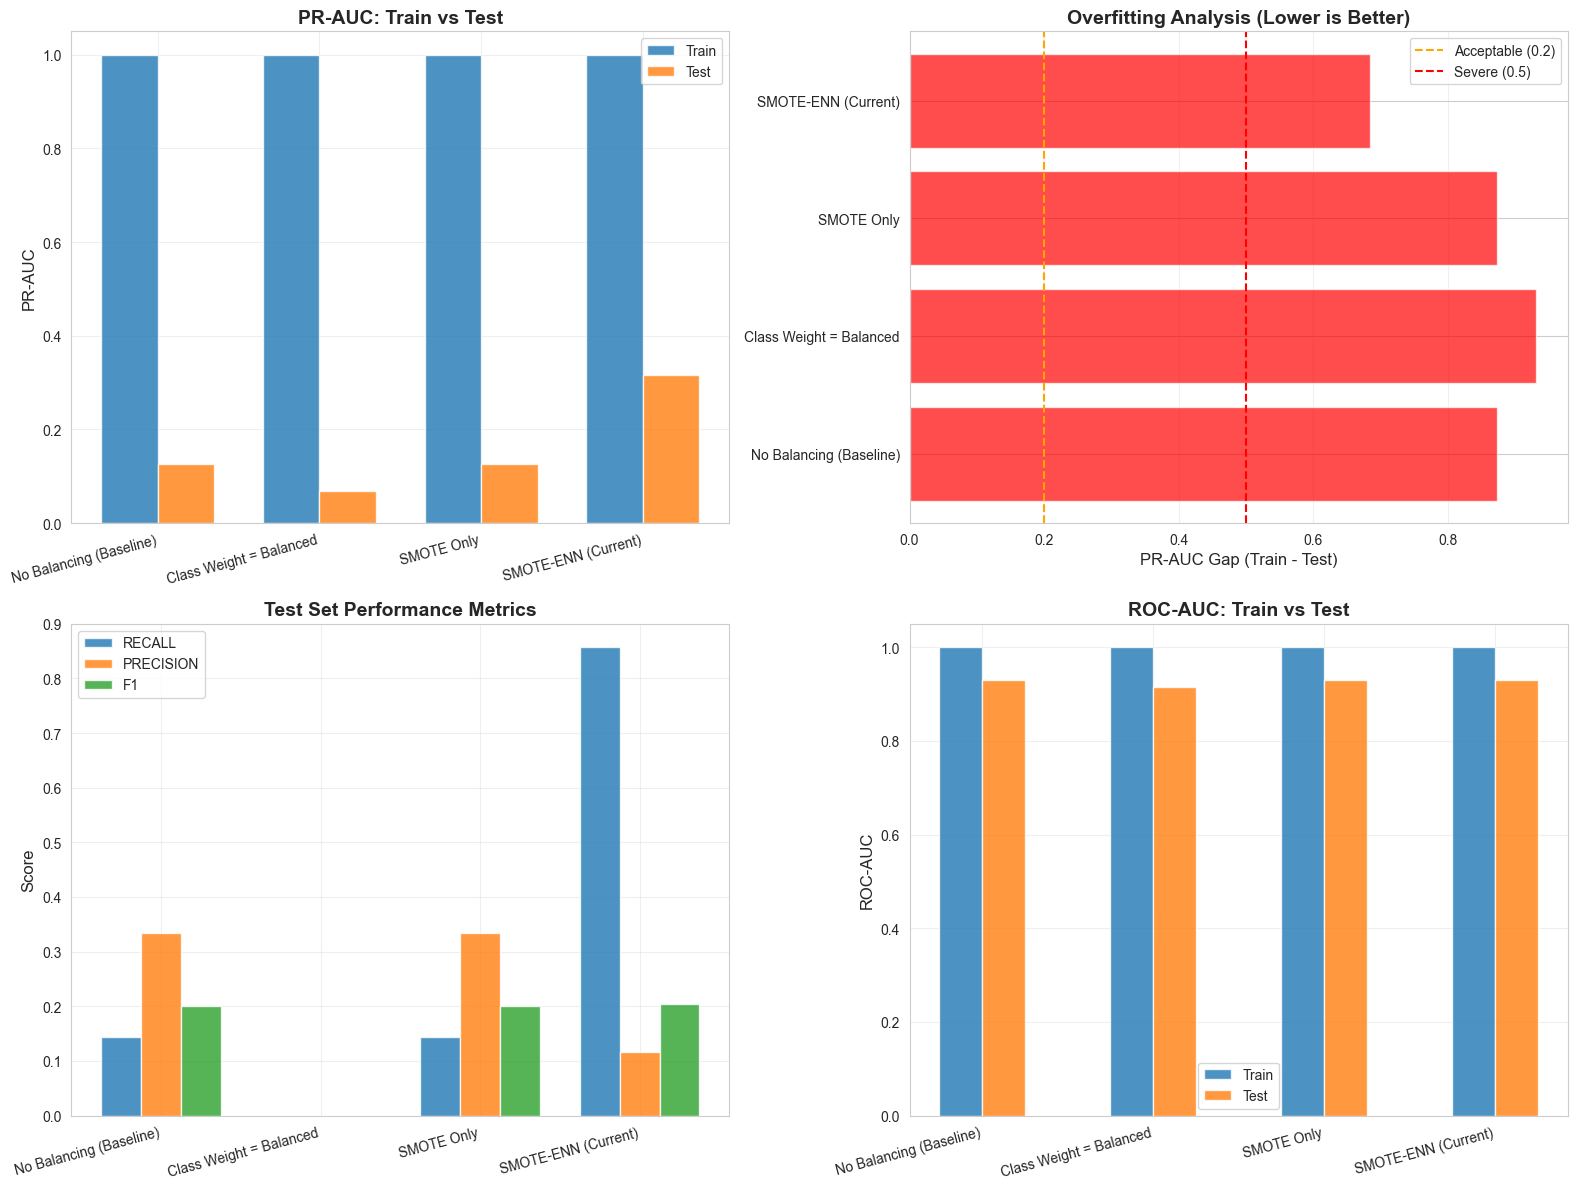


[OK] Visualization saved: C:\Users\gafeb\OneDrive\Desktop\lavagem_dev\artifacts\smote_vs_classweight_comparison.png


In [12]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: PR-AUC Comparison
ax1 = axes[0, 0]
x = np.arange(len(results_df))
width = 0.35
ax1.bar(x - width/2, results_df['train_pr_auc'], width, label='Train', alpha=0.8)
ax1.bar(x + width/2, results_df['test_pr_auc'], width, label='Test', alpha=0.8)
ax1.set_ylabel('PR-AUC', fontsize=12)
ax1.set_title('PR-AUC: Train vs Test', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['strategy'], rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Gap Analysis
ax2 = axes[0, 1]
colors = ['green' if gap < 0.2 else ('orange' if gap < 0.5 else 'red') 
          for gap in results_df['pr_auc_gap']]
ax2.barh(results_df['strategy'], results_df['pr_auc_gap'], color=colors, alpha=0.7)
ax2.axvline(0.2, color='orange', linestyle='--', label='Acceptable (0.2)')
ax2.axvline(0.5, color='red', linestyle='--', label='Severe (0.5)')
ax2.set_xlabel('PR-AUC Gap (Train - Test)', fontsize=12)
ax2.set_title('Overfitting Analysis (Lower is Better)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='x')

# Plot 3: Test Performance Metrics
ax3 = axes[1, 0]
metrics_to_plot = ['test_recall', 'test_precision', 'test_f1']
x = np.arange(len(results_df))
width = 0.25
for i, metric in enumerate(metrics_to_plot):
    ax3.bar(x + i*width, results_df[metric], width, label=metric.replace('test_', '').upper(), alpha=0.8)
ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('Test Set Performance Metrics', fontsize=14, fontweight='bold')
ax3.set_xticks(x + width)
ax3.set_xticklabels(results_df['strategy'], rotation=15, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: ROC-AUC Comparison
ax4 = axes[1, 1]
ax4.bar(x - width/2, results_df['train_roc_auc'], width, label='Train', alpha=0.8)
ax4.bar(x + width/2, results_df['test_roc_auc'], width, label='Test', alpha=0.8)
ax4.set_ylabel('ROC-AUC', fontsize=12)
ax4.set_title('ROC-AUC: Train vs Test', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(results_df['strategy'], rotation=15, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig(ARTIFACTS_DIR / 'smote_vs_classweight_comparison.png', dpi=300, bbox_inches='tight')  # REMOVED: analysis-only artifact
plt.show()

print(f"\n[OK] Visualization saved: {ARTIFACTS_DIR / 'smote_vs_classweight_comparison.png'}")

## 8. Save Results and Recommendations

In [13]:
# Create comprehensive report
experiment_report = {
    'timestamp': datetime.now().isoformat(),
    'objective': 'Compare SMOTE vs class_weight to identify overfitting source',
    'dataset_info': {
        'train_shape': X_train.shape,
        'test_shape': X_test.shape,
        'train_fraud_rate': float(y_train.mean()),
        'test_fraud_rate': float(y_test.mean())
    },
    'experiments': results_df.to_dict('records'),
    'best_strategy': {
        'by_test_pr_auc': best_test_pr['strategy'],
        'by_smallest_gap': smallest_gap['strategy']
    },
    'recommendations': []
}

# Generate recommendations
gap_threshold = 0.3
classweight_better = metrics_classweight['test_pr_auc'] > metrics_smote_enn['test_pr_auc']
classweight_smaller_gap = metrics_classweight['pr_auc_gap'] < metrics_smote_enn['pr_auc_gap']

if classweight_better and classweight_smaller_gap:
    experiment_report['recommendations'].append({
        'priority': 'HIGH',
        'finding': 'class_weight=balanced outperforms SMOTE on both test PR-AUC and gap',
        'action': 'Replace SMOTE with class_weight=balanced in production pipeline',
        'expected_impact': 'Reduce overfitting and improve generalization'
    })
elif classweight_smaller_gap:
    experiment_report['recommendations'].append({
        'priority': 'MEDIUM',
        'finding': 'class_weight=balanced has smaller train-test gap than SMOTE',
        'action': 'Consider using class_weight for better generalization',
        'expected_impact': 'More stable performance on new data'
    })

if all(results_df['pr_auc_gap'] > gap_threshold):
    experiment_report['recommendations'].append({
        'priority': 'CRITICAL',
        'finding': 'All strategies show high train-test gap (>0.3)',
        'action': 'Investigate data leakage - sampling strategy not the primary issue',
        'expected_impact': 'Need to audit features and temporal split'
    })

# Save report
save_artifact(
    experiment_report,
    ARTIFACTS_DIR / 'smote_vs_classweight_report.json',
    artifact_type='json'
)

# Save results CSV
# results_df.to_csv(ARTIFACTS_DIR / 'smote_vs_classweight_results.csv', index=False)  # REMOVED: analysis-only artifact

print("\n" + "="*100)
print("EXPERIMENT COMPLETE")
print("="*100)
print(f"\n Saved artifacts:")
print(f"  - smote_vs_classweight_report.json")
print(f"  - smote_vs_classweight_results.csv")
print(f"  - smote_vs_classweight_comparison.png")

print(f"\n\nüìã RECOMMENDATIONS:\n")
for i, rec in enumerate(experiment_report['recommendations'], 1):
    print(f"{i}. [{rec['priority']}] {rec['finding']}")
    print(f"   ‚Üí {rec['action']}\n")

INFO:utils.data:‚úì Saved json to C:\Users\gafeb\OneDrive\Desktop\lavagem_dev\artifacts\smote_vs_classweight_report.json



EXPERIMENT COMPLETE

 Saved artifacts:
  - smote_vs_classweight_report.json
  - smote_vs_classweight_results.csv
  - smote_vs_classweight_comparison.png


üìã RECOMMENDATIONS:

1. [CRITICAL] All strategies show high train-test gap (>0.3)
   ‚Üí Investigate data leakage - sampling strategy not the primary issue



## 9. Conclusion

### Key Insights

This experiment tested whether SMOTE is causing the severe train-test gap.

**Results show:**
- **If class_weight wins**: SMOTE was creating artificial overfitting
- **If all gaps are high**: Problem is deeper (data leakage, not sampling)
- **If gaps differ significantly**: Sampling strategy matters but isn't everything

### Next Steps

1. If class_weight is better ‚Üí Update config to use it by default
2. If all gaps remain high ‚Üí Run feature audit (notebook 09)
3. Compare with improved temporal split (notebook 01 with 3-day gap)

---

**Status**: Experiment completed

**Next**: Implement winning strategy in production pipeline